# Assignment 4
<br>*Last edit: 2/26/2021*

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# Neural Net
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# other things
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Prepare the data

In [2]:
# 
path = os.getcwd() + '\\big_data_categorized1.csv'
data = pd.read_csv(path, header=0, names=['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'audio_features', 'id' , 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'target'], encoding = "ISO-8859-1")
target = data['target']
# Remove features that don't contribute to the classification of the tracks
del data['target']
del data['name']
del data['artists']
del data['type']
del data['audio_features']
del data['id']
del data['uri']
del data['track_href']
del data['analysis_url']

del data['time_signature']

'''target=target.replace(to_replace="indie",value="0")
target=target.replace(to_replace="rock",value="1")
target=target.replace(to_replace="pop",value="2")
target=target.replace(to_replace="hiphop",value="3")
target=target.replace(to_replace="country",value="4")
target=target.replace(to_replace="randb",value="5")
target=target.replace(to_replace="latin",value="6")
target=target.replace(to_replace="dance",value="7")
target=target.replace(to_replace="folk",value="8")
target=target.replace(to_replace="jazz",value="9")
target=target.replace(to_replace="classical",value="10")
target=target.replace(to_replace="soul",value="11")
target=target.replace(to_replace="punk",value="12")
target=target.replace(to_replace="metal",value="13")
target=target.replace(to_replace="reggae",value="14")'''

data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.646,0.669,6,-7.310,0,0.0275,0.0148,0.000115,0.373,0.484,114.999,191685
1,0.689,0.493,10,-8.138,1,0.0419,0.6960,0.000129,0.133,0.314,96.027,165000
2,0.822,0.660,0,-5.618,1,0.0553,0.1520,0.007470,0.209,0.611,122.006,184800
3,0.641,0.857,7,-7.572,1,0.0431,0.0388,0.727000,0.339,0.781,150.000,188173
4,0.585,0.867,2,-2.580,1,0.1170,0.0698,0.000000,0.140,0.464,146.010,165680


In [3]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((909, 12), (304, 12), (909,), (304,))

In [4]:
# Test many models
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [5]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [6]:
for model in classifiers:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_df = pd.DataFrame(conf_matrix)
    display(conf_df)
    print(classification_report(y_test, y_pred))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,2,1,3,4,1,2,1,0,1,0,0,1,2,0
1,3,2,2,5,4,1,0,0,2,0,0,0,1,0,0
2,1,2,2,2,4,2,1,0,1,3,0,0,0,0,0
3,5,5,2,9,2,2,1,4,1,0,0,1,1,0,1
4,4,2,5,2,4,3,0,1,1,0,1,0,0,0,0
5,3,4,5,5,6,3,0,0,0,1,0,0,0,0,0
6,5,1,0,6,0,0,9,1,0,0,0,0,0,6,1
7,2,5,1,8,1,1,0,0,0,0,0,0,0,0,1
8,3,0,2,6,2,1,2,2,0,0,0,0,0,3,0
9,2,2,2,3,0,2,0,3,0,0,0,0,0,0,0


              precision    recall  f1-score   support

   classical       0.00      0.00      0.00        18
     country       0.06      0.10      0.07        20
       dance       0.06      0.11      0.08        18
        folk       0.13      0.26      0.18        34
      hiphop       0.12      0.17      0.14        23
       indie       0.15      0.11      0.13        27
        jazz       0.32      0.31      0.32        29
       latin       0.00      0.00      0.00        19
       metal       0.00      0.00      0.00        21
         pop       0.00      0.00      0.00        14
        punk       0.00      0.00      0.00        11
       randb       0.00      0.00      0.00        14
      reggae       0.00      0.00      0.00        10
        rock       0.00      0.00      0.00        20
        soul       0.00      0.00      0.00        26

    accuracy                           0.10       304
   macro avg       0.06      0.07      0.06       304
weighted avg       0.08   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,14,2,0,0,0,0,2,0,0,0,0,0
3,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2,21,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0
9,0,0,2,12,0,0,0,0,0,0,0,0,0,0,0


              precision    recall  f1-score   support

   classical       0.00      0.00      0.00        18
     country       0.00      0.00      0.00        20
       dance       0.00      0.00      0.00        18
        folk       0.11      1.00      0.21        34
      hiphop       0.00      0.00      0.00        23
       indie       0.00      0.00      0.00        27
        jazz       0.00      0.00      0.00        29
       latin       0.00      0.00      0.00        19
       metal       0.00      0.00      0.00        21
         pop       0.00      0.00      0.00        14
        punk       0.00      0.00      0.00        11
       randb       0.00      0.00      0.00        14
      reggae       0.00      0.00      0.00        10
        rock       0.00      0.00      0.00        20
        soul       0.00      0.00      0.00        26

    accuracy                           0.11       304
   macro avg       0.01      0.07      0.01       304
weighted avg       0.01   

C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,16,0,0,2,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,0,14,0,0,1,0,0,0,0,1,2
2,0,0,5,0,11,1,0,0,1,0,0,0,0,0,0
3,0,0,1,20,0,5,0,0,1,0,0,0,0,1,6
4,0,0,1,0,19,0,0,0,0,0,0,0,2,0,1
5,0,0,12,0,1,8,0,0,2,0,0,0,0,1,3
6,0,0,2,7,0,5,10,0,0,0,0,0,0,3,2
7,0,0,9,0,6,1,0,0,0,0,0,0,0,2,1
8,0,0,0,0,7,1,0,0,12,0,0,0,1,0,0
9,0,0,9,0,1,2,0,0,0,0,0,0,1,0,1


              precision    recall  f1-score   support

   classical       1.00      0.89      0.94        18
     country       0.00      0.00      0.00        20
       dance       0.10      0.28      0.15        18
        folk       0.59      0.59      0.59        34
      hiphop       0.33      0.83      0.47        23
       indie       0.15      0.30      0.20        27
        jazz       0.83      0.34      0.49        29
       latin       0.00      0.00      0.00        19
       metal       0.55      0.57      0.56        21
         pop       0.00      0.00      0.00        14
        punk       1.00      0.27      0.43        11
       randb       0.00      0.00      0.00        14
      reggae       0.29      0.20      0.24        10
        rock       0.35      0.30      0.32        20
        soul       0.38      0.50      0.43        26

    accuracy                           0.38       304
   macro avg       0.37      0.34      0.32       304
weighted avg       0.39   

C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,4,0,6,0,10,0,0,0,0,0,0,0,0,0
2,0,0,4,3,6,2,1,0,0,1,0,0,1,0,0
3,1,0,0,30,0,1,0,0,0,0,0,0,0,2,0
4,1,0,2,0,16,1,0,0,0,1,0,0,2,0,0
5,0,0,1,9,1,14,0,0,0,2,0,0,0,0,0
6,1,0,0,8,0,0,16,0,0,0,0,0,0,3,1
7,0,0,1,4,3,9,0,0,0,2,0,0,0,0,0
8,0,0,1,2,0,6,0,3,2,0,2,0,0,5,0
9,1,0,0,1,4,5,0,0,0,3,0,0,0,0,0


              precision    recall  f1-score   support

   classical       0.78      1.00      0.88        18
     country       1.00      0.20      0.33        20
       dance       0.33      0.22      0.27        18
        folk       0.37      0.88      0.52        34
      hiphop       0.43      0.70      0.53        23
       indie       0.20      0.52      0.29        27
        jazz       0.73      0.55      0.63        29
       latin       0.00      0.00      0.00        19
       metal       0.67      0.10      0.17        21
         pop       0.21      0.21      0.21        14
        punk       0.33      0.09      0.14        11
       randb       1.00      0.07      0.13        14
      reggae       0.20      0.10      0.13        10
        rock       0.32      0.35      0.33        20
        soul       0.50      0.08      0.13        26

    accuracy                           0.39       304
   macro avg       0.47      0.34      0.31       304
weighted avg       0.48   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0


C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   classical       0.00      0.00      0.00        18
     country       0.00      0.00      0.00        20
       dance       0.00      0.00      0.00        18
        folk       0.00      0.00      0.00        34
      hiphop       0.00      0.00      0.00        23
       indie       0.00      0.00      0.00        27
        jazz       0.00      0.00      0.00        29
       latin       0.00      0.00      0.00        19
       metal       0.00      0.00      0.00        21
         pop       0.00      0.00      0.00        14
        punk       0.04      1.00      0.07        11
       randb       0.00      0.00      0.00        14
      reggae       0.00      0.00      0.00        10
        rock       0.00      0.00      0.00        20
        soul       0.00      0.00      0.00        26

    accuracy                           0.04       304
   macro avg       0.00      0.07      0.00       304
weighted avg       0.00   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,17,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,33,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0
6,2,0,0,27,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0


              precision    recall  f1-score   support

   classical       0.85      0.94      0.89        18
     country       0.00      0.00      0.00        20
       dance       0.00      0.00      0.00        18
        folk       0.12      0.97      0.21        34
      hiphop       0.00      0.00      0.00        23
       indie       0.00      0.00      0.00        27
        jazz       0.00      0.00      0.00        29
       latin       0.00      0.00      0.00        19
       metal       0.00      0.00      0.00        21
         pop       0.00      0.00      0.00        14
        punk       0.00      0.00      0.00        11
       randb       0.00      0.00      0.00        14
      reggae       0.00      0.00      0.00        10
        rock       0.00      0.00      0.00        20
        soul       0.00      0.00      0.00        26

    accuracy                           0.16       304
   macro avg       0.06      0.13      0.07       304
weighted avg       0.06   

C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,17,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,3,2,1,0,9,0,0,0,1,0,0,4,0,0
2,0,0,5,1,4,6,0,0,0,1,0,0,1,0,0
3,0,0,0,22,1,7,0,1,0,0,0,0,1,2,0
4,0,1,2,0,7,11,0,0,0,0,1,0,1,0,0
5,0,1,9,1,5,10,0,0,0,0,0,0,1,0,0
6,1,0,0,8,0,0,11,0,0,0,0,1,0,8,0
7,0,0,4,2,3,3,0,1,1,2,0,0,2,1,0
8,0,2,3,3,3,2,0,1,4,0,0,2,1,0,0
9,0,0,0,2,4,8,0,0,0,0,0,0,0,0,0


              precision    recall  f1-score   support

   classical       0.94      0.94      0.94        18
     country       0.43      0.15      0.22        20
       dance       0.19      0.28      0.23        18
        folk       0.32      0.65      0.43        34
      hiphop       0.22      0.30      0.25        23
       indie       0.14      0.37      0.20        27
        jazz       0.65      0.38      0.48        29
       latin       0.25      0.05      0.09        19
       metal       0.57      0.19      0.29        21
         pop       0.00      0.00      0.00        14
        punk       0.50      0.18      0.27        11
       randb       0.33      0.14      0.20        14
      reggae       0.00      0.00      0.00        10
        rock       0.21      0.20      0.21        20
        soul       0.67      0.08      0.14        26

    accuracy                           0.30       304
   macro avg       0.36      0.26      0.26       304
weighted avg       0.38   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,17,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,17,0,0,0,1,0,1,0,0,0,0,1,0,0
2,0,3,5,1,4,0,0,4,0,1,0,0,0,0,0
3,0,1,0,25,0,3,1,2,0,0,0,0,0,2,0
4,0,1,1,0,16,0,0,3,0,0,0,0,2,0,0
5,0,9,1,2,0,7,0,3,1,0,0,0,1,3,0
6,2,0,0,3,0,0,18,1,0,0,1,1,1,2,0
7,0,7,1,3,2,2,0,3,0,0,0,0,1,0,0
8,0,6,0,0,0,1,0,0,11,0,2,0,1,0,0
9,0,8,2,0,0,1,0,1,0,0,0,0,2,0,0


              precision    recall  f1-score   support

   classical       0.89      0.94      0.92        18
     country       0.27      0.85      0.41        20
       dance       0.45      0.28      0.34        18
        folk       0.64      0.74      0.68        34
      hiphop       0.62      0.70      0.65        23
       indie       0.44      0.26      0.33        27
        jazz       0.75      0.62      0.68        29
       latin       0.17      0.16      0.16        19
       metal       0.73      0.52      0.61        21
         pop       0.00      0.00      0.00        14
        punk       0.58      0.64      0.61        11
       randb       0.00      0.00      0.00        14
      reggae       0.28      0.50      0.36        10
        rock       0.38      0.45      0.41        20
        soul       0.53      0.35      0.42        26

    accuracy                           0.49       304
   macro avg       0.45      0.47      0.44       304
weighted avg       0.49   

              precision    recall  f1-score   support

   classical       0.90      1.00      0.95        18
     country       0.64      0.70      0.67        20
       dance       0.24      0.22      0.23        18
        folk       0.54      0.82      0.65        34
      hiphop       0.55      0.78      0.64        23
       indie       0.42      0.48      0.45        27
        jazz       0.87      0.69      0.77        29
       latin       0.33      0.21      0.26        19
       metal       0.67      0.67      0.67        21
         pop       0.22      0.14      0.17        14
        punk       0.60      0.55      0.57        11
       randb       0.50      0.36      0.42        14
      reggae       0.67      0.40      0.50        10
        rock       0.46      0.55      0.50        20
        soul       0.79      0.42      0.55        26

    accuracy                           0.57       304
   macro avg       0.56      0.53      0.53       304
weighted avg       0.57   

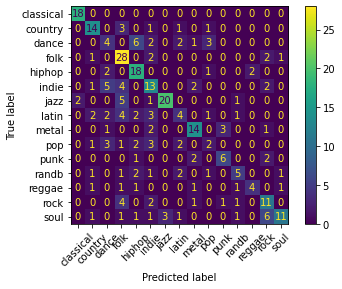

In [7]:
# Random Forest Classifier No Regularization
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

              precision    recall  f1-score   support

   classical       0.89      0.94      0.92        18
     country       0.27      0.85      0.41        20
       dance       0.45      0.28      0.34        18
        folk       0.64      0.74      0.68        34
      hiphop       0.62      0.70      0.65        23
       indie       0.44      0.26      0.33        27
        jazz       0.75      0.62      0.68        29
       latin       0.17      0.16      0.16        19
       metal       0.73      0.52      0.61        21
         pop       0.00      0.00      0.00        14
        punk       0.58      0.64      0.61        11
       randb       0.00      0.00      0.00        14
      reggae       0.28      0.50      0.36        10
        rock       0.38      0.45      0.41        20
        soul       0.53      0.35      0.42        26

    accuracy                           0.49       304
   macro avg       0.45      0.47      0.44       304
weighted avg       0.49   

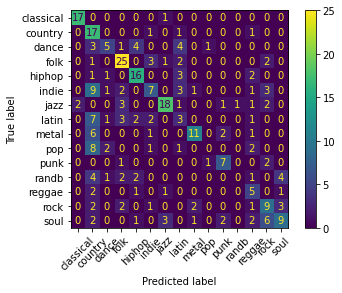

In [8]:
# Quad Discriminant No Regularization
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

C:\Users\johna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   classical       0.00      0.00      0.00        18
     country       0.00      0.00      0.00        20
       dance       0.00      0.00      0.00        18
        folk       0.11      1.00      0.21        34
      hiphop       0.00      0.00      0.00        23
       indie       0.00      0.00      0.00        27
        jazz       0.00      0.00      0.00        29
       latin       0.00      0.00      0.00        19
       metal       0.00      0.00      0.00        21
         pop       0.00      0.00      0.00        14
        punk       0.00      0.00      0.00        11
       randb       0.00      0.00      0.00        14
      reggae       0.00      0.00      0.00        10
        rock       0.00      0.00      0.00        20
        soul       0.00      0.00      0.00        26

    accuracy                           0.11       304
   macro avg       0.01      0.07      0.01       304
weighted avg       0.01   

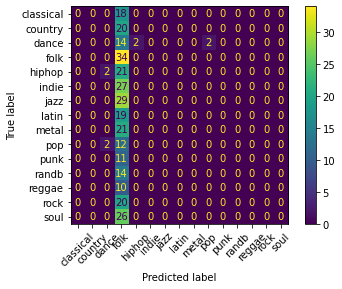

In [9]:
# SVC No Regularization
model = SVC(gamma=2, C=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

In [10]:
# MLP
# Reload dataset
path = os.getcwd() + '\\big_data_categorized1.csv'
data = pd.read_csv(path, header=0, names=['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'audio_features', 'id' , 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'target'], encoding = "ISO-8859-1")
target = data['target']
# Remove features that don't contribute to the classification of the tracks
del data['target']
del data['name']
del data['artists']
del data['type']
del data['audio_features']
del data['id']
del data['uri']
del data['track_href']
del data['analysis_url']

del data['time_signature']
# Convert labels to numbers
target=target.replace(to_replace="indie",value="0")
target=target.replace(to_replace="rock",value="1")
target=target.replace(to_replace="pop",value="2")
target=target.replace(to_replace="hiphop",value="3")
target=target.replace(to_replace="country",value="4")
target=target.replace(to_replace="randb",value="5")
target=target.replace(to_replace="latin",value="6")
target=target.replace(to_replace="dance",value="7")
target=target.replace(to_replace="folk",value="8")
target=target.replace(to_replace="jazz",value="9")
target=target.replace(to_replace="classical",value="10")
target=target.replace(to_replace="soul",value="11")
target=target.replace(to_replace="punk",value="12")
target=target.replace(to_replace="metal",value="13")
target=target.replace(to_replace="reggae",value="14")

In [11]:
# Regularize data
x = data.values
min_max_scalar = preprocessing.MinMaxScaler()
x_scaled = min_max_scalar.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)
print(data)

      danceability    energy       key  loudness  mode  speechiness  \
0         0.652592  0.670996  0.545455  0.872182   0.0     0.007470   
1         0.700626  0.493918  0.909091  0.852777   1.0     0.034360   
2         0.849196  0.661941  0.000000  0.911835   1.0     0.059384   
3         0.647006  0.860148  0.636364  0.866042   1.0     0.036601   
4         0.584450  0.870210  0.181818  0.983033   1.0     0.174603   
...            ...       ...       ...       ...   ...          ...   
1208      0.832440  0.618678  1.000000  0.894914   0.0     0.137628   
1209      0.664879  0.625721  0.090909  0.852426   0.0     0.193277   
1210      0.489500  0.700174  0.090909  0.952613   0.0     0.673203   
1211      0.693923  0.717278  1.000000  0.902320   0.0     0.103455   
1212      0.684987  0.547243  0.636364  0.937708   1.0     0.447246   

      acousticness  instrumentalness  liveness   valence     tempo  \
0         0.014858          0.000119  0.381799  0.479134  0.341095   
1      

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        27
           1       0.40      0.60      0.48        20
          10       0.95      1.00      0.97        18
          11       0.79      0.42      0.55        26
          12       0.67      0.55      0.60        11
          13       0.65      0.71      0.68        21
          14       0.56      0.50      0.53        10
           2       0.20      0.21      0.21        14
           3       0.55      0.74      0.63        23
           4       0.67      0.60      0.63        20
           5       0.38      0.21      0.27        14
           6       0.50      0.26      0.34        19
           7       0.19      0.17      0.18        18
           8       0.54      0.79      0.64        34
           9       0.80      0.69      0.74        29

    accuracy                           0.56       304
   macro avg       0.56      0.53      0.53       304
weighted avg       0.57   

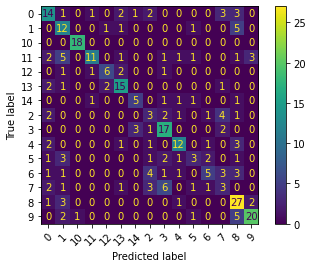

In [12]:
# Random Forest Classifier Post-Regularization
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

              precision    recall  f1-score   support

           0       0.44      0.26      0.33        27
           1       0.38      0.45      0.41        20
          10       0.89      0.94      0.92        18
          11       0.53      0.35      0.42        26
          12       0.58      0.64      0.61        11
          13       0.73      0.52      0.61        21
          14       0.28      0.50      0.36        10
           2       0.00      0.00      0.00        14
           3       0.62      0.70      0.65        23
           4       0.27      0.85      0.41        20
           5       0.00      0.00      0.00        14
           6       0.17      0.16      0.16        19
           7       0.45      0.28      0.34        18
           8       0.64      0.74      0.68        34
           9       0.75      0.62      0.68        29

    accuracy                           0.49       304
   macro avg       0.45      0.47      0.44       304
weighted avg       0.49   

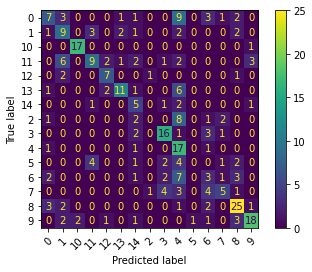

In [13]:
# Quad Discriminant Post-Regularization
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

              precision    recall  f1-score   support

           0       0.20      0.44      0.28        27
           1       0.41      0.55      0.47        20
          10       0.90      1.00      0.95        18
          11       0.56      0.35      0.43        26
          12       0.54      0.64      0.58        11
          13       0.75      0.71      0.73        21
          14       0.57      0.40      0.47        10
           2       0.25      0.07      0.11        14
           3       0.52      0.61      0.56        23
           4       0.58      0.35      0.44        20
           5       1.00      0.21      0.35        14
           6       0.33      0.05      0.09        19
           7       0.20      0.17      0.18        18
           8       0.50      0.79      0.61        34
           9       0.75      0.62      0.68        29

    accuracy                           0.49       304
   macro avg       0.54      0.46      0.46       304
weighted avg       0.53   

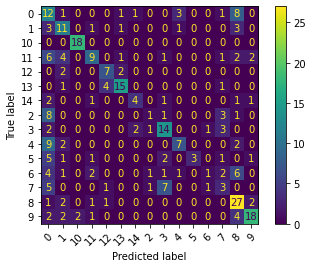

In [14]:
# SVC Post-Regularization
model = SVC(gamma=2, C=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, xticks_rotation=45)

In [15]:
# Onehot after split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

y_train_1hot = []
for data in y_train:
    hot = np.zeros(15)
    hot[int(data)] = 1
    y_train_1hot.append(hot)
        
y_test_1hot = []
for data in y_test:
    hot = np.zeros(15)
    hot[int(data)] = 1
    y_test_1hot.append(hot)
    
y_train_1hot = np.asarray(y_train_1hot)
y_test_1hot = np.asarray(y_test_1hot)

In [16]:
print(x_train.shape)
print(y_train_1hot.shape)

(909, 12)
(909, 15)


In [127]:
# 1 hidden layer, Adam
model = Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=[12]))
model.add(layers.Dense(15, activation='softmax'))

model.compile(optimizers.Adam(learning_rate=0.001, beta_1=0.95),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [128]:
history = model.fit(x_train, y_train_1hot, batch_size=32, epochs=50, validation_data=(x_test, y_test_1hot))

Epoch 1/50
29/29 [==============================] - 1s 22ms/step - loss: 2.6670 - accuracy: 0.1433 - val_loss: 2.5676 - val_accuracy: 0.2105
Epoch 2/50
29/29 [==============================] - 0s 10ms/step - loss: 2.4966 - accuracy: 0.2293 - val_loss: 2.4572 - val_accuracy: 0.2730
Epoch 3/50
29/29 [==============================] - 0s 17ms/step - loss: 2.4107 - accuracy: 0.2624 - val_loss: 2.3148 - val_accuracy: 0.3125
Epoch 4/50
29/29 [==============================] - 1s 23ms/step - loss: 2.2404 - accuracy: 0.3298 - val_loss: 2.2029 - val_accuracy: 0.2928
Epoch 5/50
29/29 [==============================] - ETA: 0s - loss: 2.0965 - accuracy: 0.34 - 0s 10ms/step - loss: 2.0997 - accuracy: 0.3423 - val_loss: 2.0953 - val_accuracy: 0.3322
Epoch 6/50
29/29 [==============================] - 0s 8ms/step - loss: 2.0434 - accuracy: 0.3604 - val_loss: 2.0226 - val_accuracy: 0.3421
Epoch 7/50
29/29 [==============================] - 0s 8ms/step - loss: 1.9805 - accuracy: 0.3668 - val_loss: 1.9

In [129]:
test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)
print('Test accuracy:', test_acc)

10/10 - 0s - loss: 1.4350 - accuracy: 0.5362
Test accuracy: 0.5361841917037964


10/10 - 0s - loss: 1.4350 - accuracy: 0.5362
0.5361841917037964


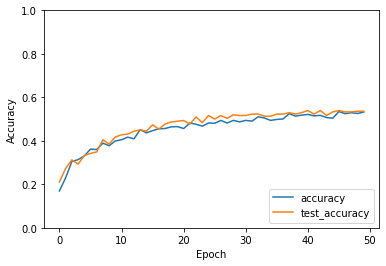

In [130]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)

print(test_acc)

In [135]:
# 2 hidden layers, Adam
model = Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=[12]))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

model.compile(optimizers.Adam(learning_rate=0.00025, beta_1=0.95),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [136]:
history = model.fit(x_train, y_train_1hot, batch_size=16, epochs=50, validation_data=(x_test, y_test_1hot))

Epoch 1/50
57/57 [==============================] - 2s 15ms/step - loss: 2.6534 - accuracy: 0.1186 - val_loss: 2.5303 - val_accuracy: 0.2171
Epoch 2/50
57/57 [==============================] - 1s 10ms/step - loss: 2.4349 - accuracy: 0.2565 - val_loss: 2.3280 - val_accuracy: 0.3257
Epoch 3/50
57/57 [==============================] - 1s 19ms/step - loss: 2.2105 - accuracy: 0.3413 - val_loss: 2.1512 - val_accuracy: 0.3125
Epoch 4/50
57/57 [==============================] - 2s 36ms/step - loss: 2.0970 - accuracy: 0.3301 - val_loss: 2.0159 - val_accuracy: 0.3487
Epoch 5/50
57/57 [==============================] - 1s 12ms/step - loss: 1.9078 - accuracy: 0.3956 - val_loss: 1.9090 - val_accuracy: 0.3849
Epoch 6/50
57/57 [==============================] - 1s 10ms/step - loss: 1.8546 - accuracy: 0.3857 - val_loss: 1.8437 - val_accuracy: 0.3947
Epoch 7/50
57/57 [==============================] - 1s 11ms/step - loss: 1.7402 - accuracy: 0.4459 - val_loss: 1.7858 - val_accuracy: 0.4046
Epoch 8/50
57

In [137]:
test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)
print('Test accuracy:', test_acc)

10/10 - 0s - loss: 1.4537 - accuracy: 0.5428
Test accuracy: 0.5427631735801697


10/10 - 0s - loss: 1.4537 - accuracy: 0.5428
0.5427631735801697


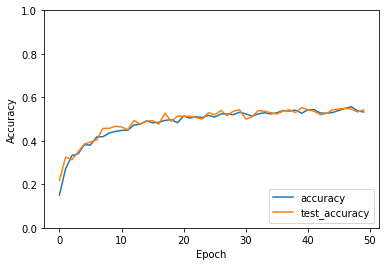

In [138]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)

print(test_acc)

In [147]:
model = Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=[12]))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

model.compile(optimizers.SGD(learning_rate=0.15),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [148]:
history = model.fit(x_train, y_train_1hot, batch_size=16, epochs=50, validation_data=(x_test, y_test_1hot))

Epoch 1/50
57/57 [==============================] - 1s 14ms/step - loss: 2.6229 - accuracy: 0.1579 - val_loss: 2.4267 - val_accuracy: 0.2105
Epoch 2/50
57/57 [==============================] - 0s 8ms/step - loss: 2.3071 - accuracy: 0.2769 - val_loss: 2.1372 - val_accuracy: 0.2993
Epoch 3/50
57/57 [==============================] - 0s 8ms/step - loss: 2.1266 - accuracy: 0.3181 - val_loss: 1.9945 - val_accuracy: 0.3257
Epoch 4/50
57/57 [==============================] - 0s 8ms/step - loss: 1.9577 - accuracy: 0.3095 - val_loss: 1.8672 - val_accuracy: 0.4309
Epoch 5/50
57/57 [==============================] - 0s 8ms/step - loss: 1.8765 - accuracy: 0.3575 - val_loss: 1.8547 - val_accuracy: 0.3586
Epoch 6/50
57/57 [==============================] - 1s 9ms/step - loss: 1.7728 - accuracy: 0.3839 - val_loss: 1.7835 - val_accuracy: 0.3717
Epoch 7/50
57/57 [==============================] - 0s 8ms/step - loss: 1.7158 - accuracy: 0.4003 - val_loss: 1.7846 - val_accuracy: 0.3816
Epoch 8/50
57/57 [=

In [149]:
test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)
print('Test accuracy:', test_acc)

10/10 - 0s - loss: 1.5858 - accuracy: 0.5033
Test accuracy: 0.5032894611358643


10/10 - 0s - loss: 1.5858 - accuracy: 0.5033
0.5032894611358643


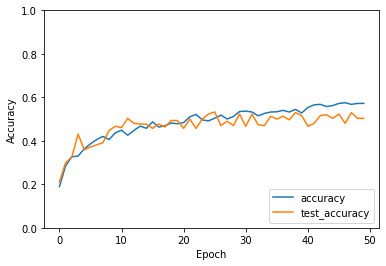

In [150]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test_1hot, verbose=2)

print(test_acc)

In [25]:
# 
path = os.getcwd() + '\\big_data_categorized1.csv'
data = pd.read_csv(path, header=0, names=['name', 'artists', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'audio_features', 'id' , 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'target'], encoding = "ISO-8859-1")
# Remove features that don't contribute to the classification of the tracks
del data['name']
del data['artists']
del data['type']
del data['audio_features']
del data['id']
del data['uri']
del data['track_href']
del data['analysis_url']

NameError: name 'legend_elements' is not defined

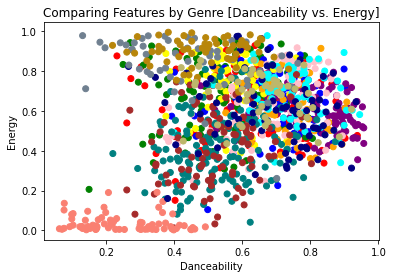

In [26]:
colors = {'indie':'red','rock':'green','pop':'blue','hiphop':'purple',
          'country':'yellow','randb':'orange','latin':'pink','dance':'cyan',
          'folk':'teal','jazz':'brown','classical':'salmon','soul':'navy',
          'punk':'slategrey','metal':'darkgoldenrod','reggae':'darkkhaki'}

'''legend_elements = [Line2D([0], [0], marker='o', color='w', label='Jazz',
                          markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='Rock',
                          markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='Hip-hop',
                          markerfacecolor='b', markersize=15)]'''


fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Danceability vs. Energy]')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')

# How danceable the song is vs the energy/intensity of the song
ax.scatter(data['danceability'], data['energy'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='upper left')

plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Valence vs. Acousticness]')
ax.set_xlabel('Valence')
ax.set_ylabel('Acousticness')

# Audience in recording vs use of acoustic instruments
ax.scatter(data['valence'], data['acousticness'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='upper right')

plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Energy vs. Loudness]')
ax.set_xlabel('Energy')
ax.set_ylabel('Loudness')

# Happiness/valence vs tempo
ax.scatter(data['energy'], data['loudness'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='lower right')

plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_title('Comparing Features by Genre [Speechiness vs. Instrumentalness]')
ax.set_xlabel('Speechiness')
ax.set_ylabel('Instrumentalness')

# Use of words vs use of instruments
ax.scatter(data['speechiness'], data['instrumentalness'], c=data['target'].map(colors))

plt.legend(handles=legend_elements, loc='upper right')

plt.show()